In [2]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt

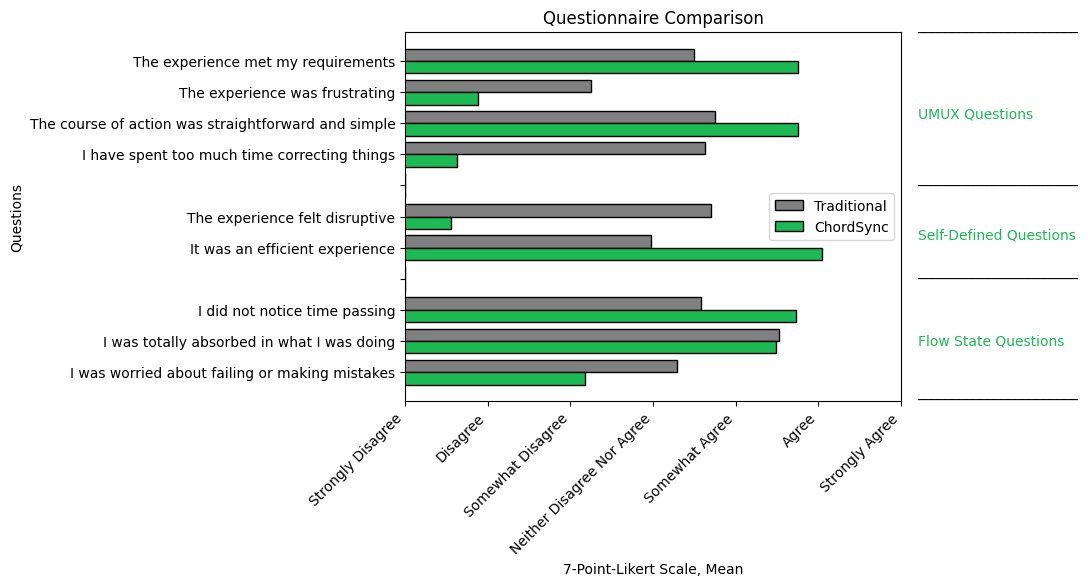

In [3]:
"""
-> UMUX-Lite:
Scale from 1 - 7 
(1 = Strongly Disagree, 2 = Disagree, 3 = Somewhat Disagree, 4 = Neither Disagree Nor Agree, 5 = Somewhat Agree, 6 = Agree, 7 = Strongly Agree)
Mapped to the values 13, 14, 15, 16, 17, 18, 19

1: The experience met my requirements	
2: The experience was frustrating	
3: The course of action was straightforward and simple	
4: I have spent too much time correcting things	

-> Two selfdefined Questions:
Slider from 1 - 100 with guide:
Strongly Disagree, Disagree, Somewhat Disagree, Neither Disagree Nor Agree, Somewhat Agree, Agree, Strongly Agree

-> Three Questions based on Flow State Scale:
Analog to selfdefined questions

"""
# UMUX
traditional_1_mean = 16.5
traditional_2_mean = 15.25
traditional_3_mean = 16.75
traditional_4_mean = 16.63

chordsync_1_mean = 17.75
chordsync_2_mean = 13.88
chordsync_3_mean = 17.75
chordsync_4_mean = 13.63


# Self-defined (Map from 1-100 to 13-19)
traditional_5_mean_original = 61.00
traditional_6_mean_original = 49.00
traditional_5_mean_mapped = traditional_5_mean_original*(6/99)+13
traditional_6_mean_mapped = traditional_6_mean_original*(6/99)+13

chordsync_5_mean_original = 9.25
chordsync_6_mean_original = 83.25
chordsync_5_mean_mapped = chordsync_5_mean_original*(6/99)+13
chordsync_6_mean_mapped = chordsync_6_mean_original*(6/99)+13

# Flow state scale
traditional_7_mean_original = 59.13
traditional_8_mean_original = 74.63
traditional_9_mean_original = 54.38
traditional_7_mean_mapped = traditional_7_mean_original*(6/99)+13
traditional_8_mean_mapped = traditional_8_mean_original*(6/99)+13
traditional_9_mean_mapped = traditional_9_mean_original*(6/99)+13

chordsync_7_mean_original = 78.13
chordsync_8_mean_original = 74.13
chordsync_9_mean_original = 35.88
chordsync_7_mean_mapped = chordsync_7_mean_original*(6/99)+13
chordsync_8_mean_mapped = chordsync_8_mean_original*(6/99)+13
chordsync_9_mean_mapped = chordsync_9_mean_original*(6/99)+13


traditional_means = [traditional_1_mean, traditional_2_mean, traditional_3_mean, traditional_4_mean, 0,
                          traditional_5_mean_mapped, traditional_6_mean_mapped, 0,
                          traditional_7_mean_mapped, traditional_8_mean_mapped, traditional_9_mean_mapped]

chordsync_means = [chordsync_1_mean, chordsync_2_mean, chordsync_3_mean, chordsync_4_mean, 0,
                        chordsync_5_mean_mapped, chordsync_6_mean_mapped, 0,
                        chordsync_7_mean_mapped, chordsync_8_mean_mapped, chordsync_9_mean_mapped]

scale_values = [13, 14, 15, 16, 17, 18, 19]

seven_point_likert = [
    "Strongly Disagree",
    "Disagree",
    "Somewhat Disagree",
    "Neither Disagree Nor Agree",
    "Somewhat Agree",
    "Agree",
    "Strongly Agree"
]

X = [
    "The experience met my requirements",
    "The experience was frustrating",
    "The course of action was straightforward and simple",
    "I have spent too much time correcting things", "",
    
    "The experience felt disruptive",
    "It was an efficient experience", "",
    
    "I did not notice time passing",
    "I was totally absorbed in what I was doing",
    "I was worried about failing or making mistakes"
]

umux_lite_color = '#1DB954'
self_defined_color = '#1DB954'
flow_state_color = '#1DB954'

colors_traditional = ['grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']
colors_chordsync = [umux_lite_color, umux_lite_color, umux_lite_color, umux_lite_color, 'grey', self_defined_color, self_defined_color, 'grey', flow_state_color, flow_state_color, flow_state_color]

X.reverse()
colors_traditional.reverse()
colors_chordsync.reverse()

Y_axis = np.arange(len(X))

# SUS score aussrechnen (system usability scale)
# https://measuringu.com/umux-lite/
# How to Calculate the UMUX Score
# umux score aussrchen https://help.qualaroo.com/usability-metric-for-user-experience (scala von 1-7), auf scale mapping und dann halt scale relativ abziehen
# mit diesen scroe vergleichen, bzwl sehr relavante punkte direkt ansprechen
# Dependend/paired t-test (signifikanter unterschied zwischen den beiden systemen) (hier within-subject design) (wilcoxon signed rank test)
# https://testscience.org/measuring-usability/  (Formel für UMUX und SUS, beide machen und vgleichen)
labels = ['Flow State Questions', 'Self-Defined Questions', 'UMUX Questions', "_______________________"]
colors = [flow_state_color, self_defined_color, umux_lite_color]

plt.text(19.2, 8.3, labels[2], color=colors[2], va='center', ha='left')
plt.text(19.2, 4.4, labels[1], color=colors[1], va='center', ha='left')
plt.text(19.2, Y_axis[1], labels[0], color=colors[0], va='center', ha='left')

plt.text(19.2, 3.2, labels[3], color="black", va='center', ha='left')
plt.text(19.2, 6.2, labels[3], color="black", va='center', ha='left')

plt.text(19.2, -0.7, labels[3], color="black", va='center', ha='left')
plt.text(19.2, 11.1, labels[3], color="black", va='center', ha='left')


plt.barh(Y_axis + 0.2, np.maximum(traditional_means[::-1], 13), 0.4, label='Traditional', color=colors_traditional, edgecolor='black')
plt.barh(Y_axis - 0.2, np.maximum(chordsync_means[::-1], 13), 0.4, label='ChordSync', color=colors_chordsync, edgecolor='black')

plt.yticks(Y_axis, X, rotation=0, ha="right") 
plt.xticks(scale_values, seven_point_likert, rotation=45, ha="right")  # Rotate x-axis labels by 45 degrees
plt.xlim(13, 19)  # Set the minimum value for the x-axis

plt.xlabel("7-Point-Likert Scale, Mean")
plt.ylabel("Questions")
plt.title("Questionnaire Comparison")
plt.legend()
plt.show()
